In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"D:/freelance/web phising detection/phishing.csv")

In [3]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [6]:
df.shape

(11054, 32)

In [7]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split,cross_val_score

In [9]:
X= df.drop(columns='class')
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1


In [10]:
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [11]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [12]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 31)
(3317, 31)
(7737, 1)
(3317, 1)


In [13]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
logreg_predict= model_1.predict(test_X)

In [16]:
accuracy_score(logreg_predict,test_Y)

0.9276454627675611

In [17]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [18]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

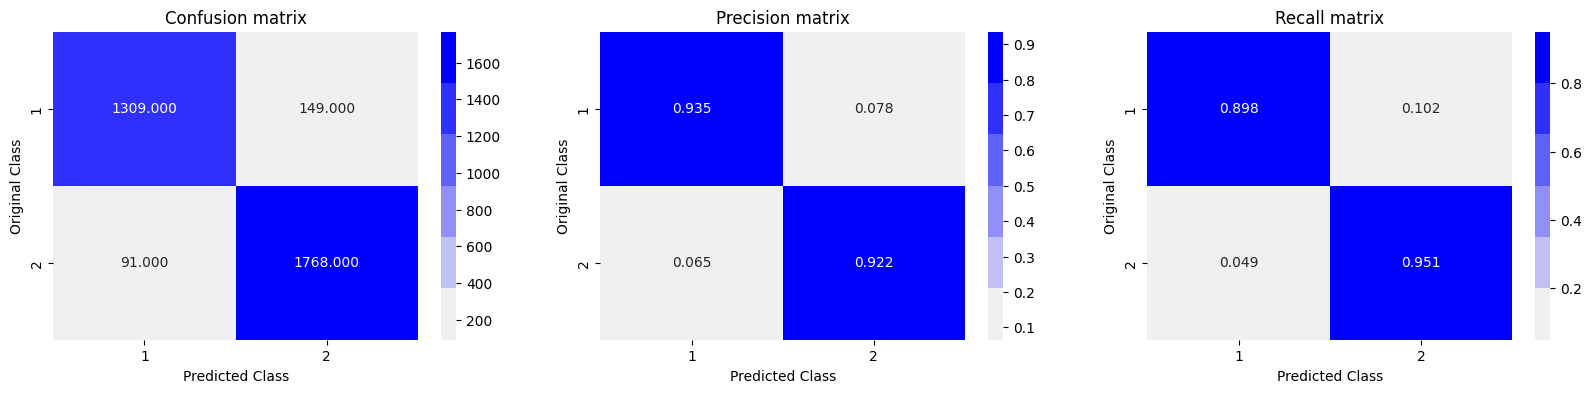

In [19]:
plot_confusion_matrix(test_Y, logreg_predict)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [22]:
knn_predict=model_2.predict(test_X)

In [23]:
accuracy_score(knn_predict,test_Y)

0.6352125414531203

In [24]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.58      0.59      0.59      1458
           1       0.68      0.67      0.67      1859

    accuracy                           0.64      3317
   macro avg       0.63      0.63      0.63      3317
weighted avg       0.64      0.64      0.64      3317



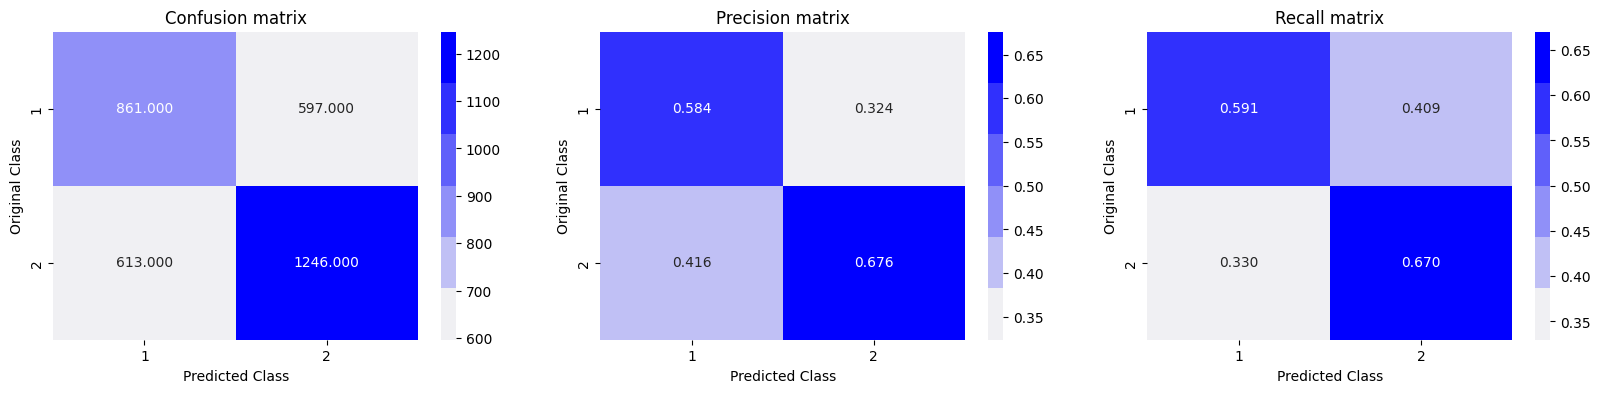

In [25]:
plot_confusion_matrix(test_Y, knn_predict)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [28]:
dtree_predict=model_3.predict(test_X)

In [29]:
accuracy_score(dtree_predict,test_Y)

0.9478444377449503

In [30]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1419
           1       0.96      0.94      0.95      1898

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



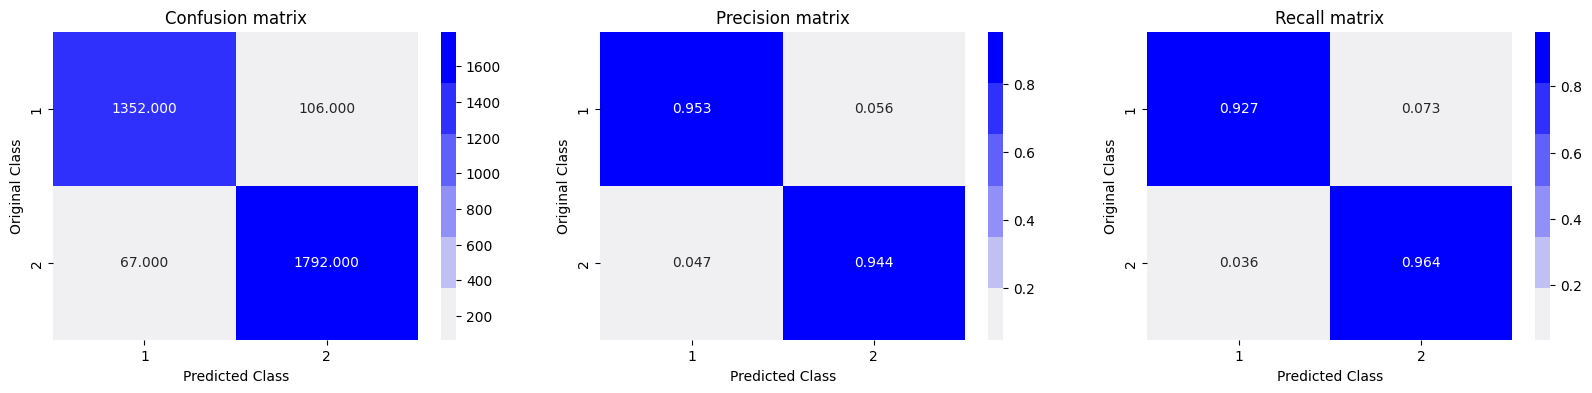

In [31]:
plot_confusion_matrix(test_Y, dtree_predict)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9896\1551461989.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4=rfc.fit(train_X,train_Y)


In [34]:
rfc_predict=model_4.predict(test_X)

accuracy_score(rfc_predict,test_Y)

0.9719626168224299

In [35]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1437
           1       0.98      0.97      0.98      1880

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



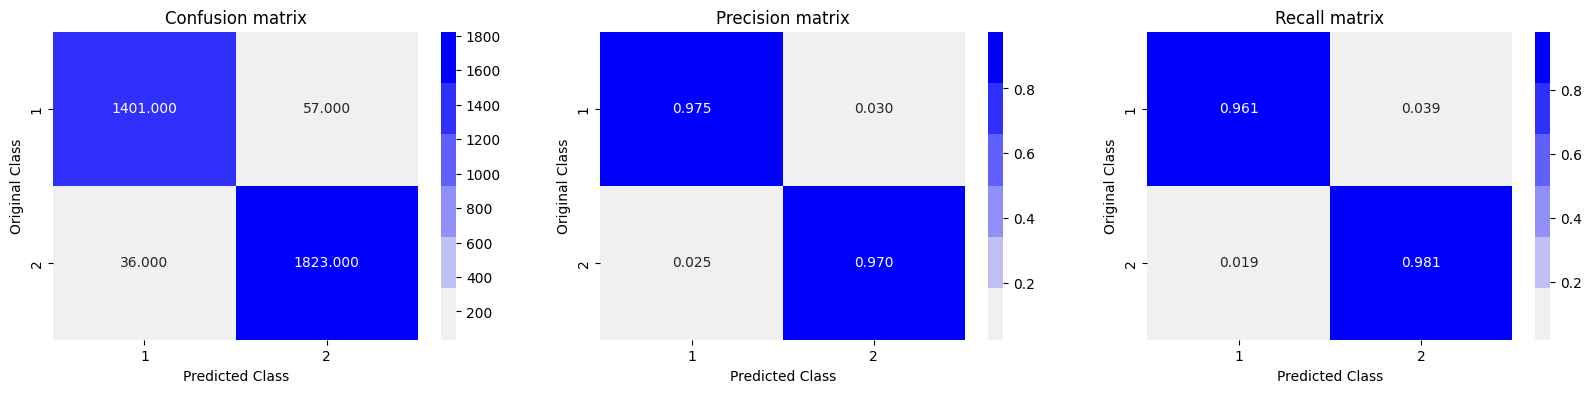

In [36]:
plot_confusion_matrix(test_Y, rfc_predict)

In [37]:
from sklearn.svm import SVC
svc=SVC()
model_5=svc.fit(train_X,train_Y)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
svm_predict=model_5.predict(test_X)
accuracy_score(svm_predict,test_Y)

0.5604461863129334

In [39]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.56      0.72      3317

    accuracy                           0.56      3317
   macro avg       0.50      0.28      0.36      3317
weighted avg       1.00      0.56      0.72      3317



C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9896\2948309362.py:4: RuntimeWarning: invalid value encountered in divide
  B =(C/C.sum(axis=0))


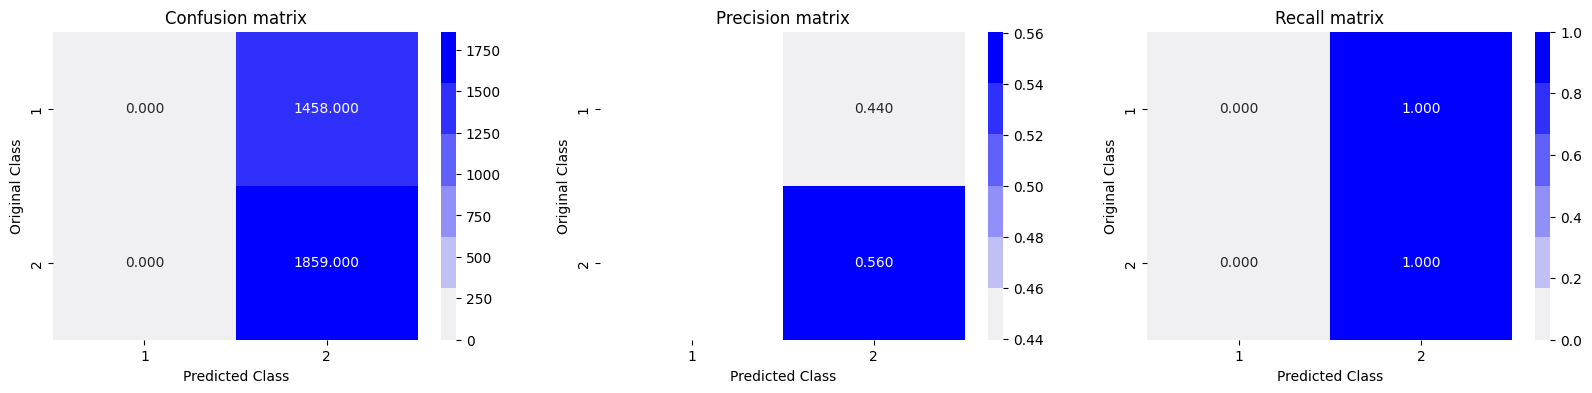

In [40]:
plot_confusion_matrix(test_Y, svm_predict)

In [ ]:
thank you!!!